In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd
import math

In [4]:
# Comments
"""
- explore how to do ipm
- explore pcl
"""
"""
- find the corners of the chessboard when we lay it down in the ground
- get ipm of image
- find relationship between image pixels and real world coordinates
"""

'\n- find the corners of the chessboard when we lay it down in the ground\n- get ipm of image\n- find relationship between image pixels and real world coordinates\n'

In [9]:
def distance_2_points(point1, point2):
    # point is array of w,h coordinates of an image
    delta_w = point1[0]-point2[0]
    delta_h = point1[1]-point2[1]
    #return math.sqrt(math.pow(delta_w, 2) + math.pow(delta_h, 2))
    return abs(delta_w)

[[[177.       153.      ]]

 [[204.29362  194.21576 ]]

 [[121.50481  153.50586 ]]

 [[ 84.228935 191.67238 ]]]
---------------------------
[[[204.29362  153.      ]]

 [[204.29362  194.21576 ]]

 [[ 84.228935 153.50586 ]]

 [[ 84.228935 191.67238 ]]]


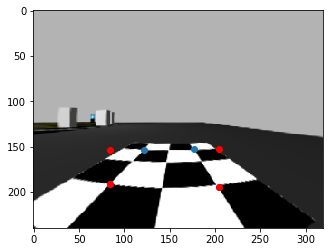

In [11]:
ground_board_path = '/home/maverick/ros_ws1/src/autonomous_turtlebot3/calib/chessboard_images/board_on_ground.png'
img = cv2.cvtColor(cv2.imread(ground_board_path), cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(cv2.imread(ground_board_path), cv2.COLOR_RGB2GRAY)
mtx = pd.read_csv(
    '/home/maverick/ros_ws1/src/autonomous_turtlebot3/calib/mtx.csv', sep=' ', header=None)
dist = pd.read_csv(
    '/home/maverick/ros_ws1/src/autonomous_turtlebot3/calib/dist.csv', sep=' ', header=None)
newcameramtx = pd.read_csv(
    '/home/maverick/ros_ws1/src/autonomous_turtlebot3/calib/newcameramtx.csv', sep=' ', header=None)
mtx = np.asarray(mtx)
dist = np.asarray(dist)
newcameramtx = np.asarray(newcameramtx)

img = cv2.undistort(img,  mtx, dist, None, newcameramtx)
lwr = np.array([0, 0, 0])
upr = np.array([255, 30, 30])
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
msk = cv2.inRange(hsv, lwr, upr)
msk = cv2.bitwise_not(msk)

ret, corners = cv2.findChessboardCorners(msk, (3, 3), None)

#img = cv2.drawChessboardCorners(msk, (3,3), corners,ret)

center = tuple([int(i) for i in corners[8][0]])
#img = cv2.circle(img, center, 5, (250, 0, 255), 1)

pts1_index = [0, 2, 6, 8]
pts1 = corners[pts1_index]
pts2 = np.arange(8, dtype='float32').reshape(4, 1, 2)

pts2[1][0][1] = pts1[1][0][1]
pts2[1][0][0] = pts1[1][0][0]

pts2[3][0][1] = pts1[3][0][1]
pts2[3][0][0] = pts1[3][0][0]

pts2[0][0][1] = pts1[0][0][1]
pts2[0][0][0] = pts1[0][0][0] + \
    distance_2_points(pts1[1][0], pts1[0][0])

pts2[2][0][1] = pts1[2][0][1]
pts2[2][0][0] = pts1[2][0][0] - \
    distance_2_points(pts1[2][0], pts1[3][0])

print(pts1)
print('---------------------------')
print(pts2)


def plot_points(points1, points2):
    x_coords_1 = []
    y_coords_1 = []
    x_coords_2 = []
    y_coords_2 = []

    for i in points1:
        x_coords_1.append(i[0][0])
        y_coords_1.append(i[0][1])
    plt.scatter(x_coords_1, y_coords_1)

    for i in points2:
        x_coords_2.append(i[0][0])
        y_coords_2.append(i[0][1])
    plt.scatter(x_coords_2, y_coords_2, c='red')
    plt.gca().invert_yaxis()


plot_points(pts1, pts2)

w, h, ch = img.shape

plt.imshow(img)


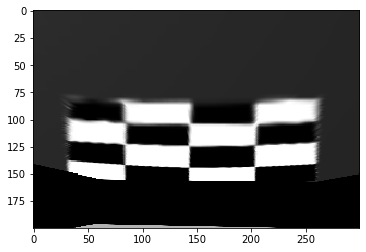

In [25]:
h_mtx = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(img, h_mtx, (w*3,h))

warped = warped[50:250, :300]

plt.imshow(warped)

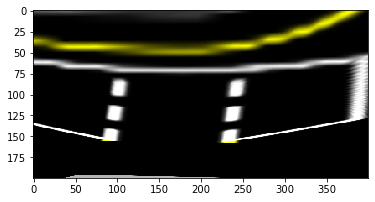

In [27]:
square_path = '/home/maverick/ros_ws1/src/autonomous_turtlebot3/calib/chessboard_images/square.png'
square = cv2.imread(square_path)
square = square
square = cv2.cvtColor( square, cv2.COLOR_BGR2RGB)
warped = cv2.warpPerspective(square, h_mtx, (w*3,h))

plt.imshow(warped[50:250, :400])

# IPM wasn't done right 

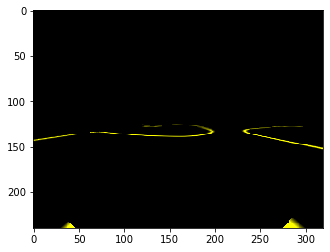

In [14]:
yellow = np.uint8([[[255,255,0]]])
white = np.uint8([[[255, 255, 255]]])

hsv = cv2.cvtColor(square, cv2.COLOR_RGB2HSV)

yellow_lower = np.array([25, 250, 10])
yellow_upper = np.array([35, 255, 255])

yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
yellow_mask = cv2.bitwise_and(square ,square, mask=yellow_mask)

plt.imshow(yellow_mask)


In [15]:
# white HSV
cv2.cvtColor(white, cv2.COLOR_RGB2HSV)

array([[[  0,   0, 255]]], dtype=uint8)